In [1]:
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
torch. __version__

'1.13.1'

In [3]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# %cd /content/drive/Shareddrives/PebbleReactorProject/Data

In [6]:
df = pd.read_csv('fluence.csv')
df.head()

,t,['0.0:7.21e+18'],['7.21e+18:1.44e+19'],['1.44e+19:2.16e+19'],['2.16e+19:2.88e+19'],['2.88e+19:3.6e+19'],['3.6e+19:4.32e+19'],['4.32e+19:5.04e+19'],['5.04e+19:5.77e+19'],['5.77e+19:6.49e+19'],...,['1.38e+21:1.39e+21'],['1.39e+21:1.4e+21'],['1.4e+21:1.41e+21'],['1.41e+21:1.41e+21'],['1.41e+21:1.42e+21'],['1.42e+21:1.43e+21'],['1.43e+21:1.43e+21'],['1.43e+21:1.44e+21'],['1.44e+21:1.45e+21'],means
0,0.0,812,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000e+00
1,1.0,812,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000e+00
2,2.0,778,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.103589e+18
3,3.0,102,161,130,198,200,21,0,0,0,...,0,0,0,0,0,0,0,0,0,2.049087e+19
4,4.0,104,0,0,1,67,127,114,178,156,...,0,0,0,0,0,0,0,0,0,4.457204e+19


In [7]:
df = df.iloc[:, :-1]

In [9]:
df.head()

,t,['0.0:7.21e+18'],['7.21e+18:1.44e+19'],['1.44e+19:2.16e+19'],['2.16e+19:2.88e+19'],['2.88e+19:3.6e+19'],['3.6e+19:4.32e+19'],['4.32e+19:5.04e+19'],['5.04e+19:5.77e+19'],['5.77e+19:6.49e+19'],...,['1.38e+21:1.38e+21'],['1.38e+21:1.39e+21'],['1.39e+21:1.4e+21'],['1.4e+21:1.41e+21'],['1.41e+21:1.41e+21'],['1.41e+21:1.42e+21'],['1.42e+21:1.43e+21'],['1.43e+21:1.43e+21'],['1.43e+21:1.44e+21'],['1.44e+21:1.45e+21']
0,0.0,812,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,812,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,778,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,102,161,130,198,200,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,104,0,0,1,67,127,114,178,156,...,0,0,0,0,0,0,0,0,0,0


In [11]:
len(df.columns) - 1

201

In [13]:
df.iloc[:, 1:201+1]

,['0.0:7.21e+18'],['7.21e+18:1.44e+19'],['1.44e+19:2.16e+19'],['2.16e+19:2.88e+19'],['2.88e+19:3.6e+19'],['3.6e+19:4.32e+19'],['4.32e+19:5.04e+19'],['5.04e+19:5.77e+19'],['5.77e+19:6.49e+19'],['6.49e+19:7.21e+19'],...,['1.38e+21:1.38e+21'],['1.38e+21:1.39e+21'],['1.39e+21:1.4e+21'],['1.4e+21:1.41e+21'],['1.41e+21:1.41e+21'],['1.41e+21:1.42e+21'],['1.42e+21:1.43e+21'],['1.43e+21:1.43e+21'],['1.43e+21:1.44e+21'],['1.44e+21:1.45e+21']
0,812,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,812,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,778,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,102,161,130,198,200,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,104,0,0,1,67,127,114,178,156,60,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,355,0,0,0,0,0,0,0,0,0,...,3,1,1,2,0,0,0,0,0,0
192,347,0,0,0,0,0,0,0,0,0,...,1,0,1,1,2,0,0,0,0,0
193,344,0,0,0,0,0,0,0,0,0,...,2,0,0,1,2,0,0,0,0,0
194,329,0,0,0,0,0,0,0,0,0,...,2,5,4,2,0,0,1,0,0,0


In [67]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming the input DataFrame is named 'df'
input_seq_length = 10  # Length of input sequence to LSTM
n_bins = len(df.columns) - 1  # Number of bins

# Extract input and target data
# Extract input and target data
input_data = df.iloc[:, 1:n_bins+1].values  # Ignore first column (time step)
target_data = df.iloc[:, 1:n_bins+1].values  # Predict counts in the same bins as input data

# Scale input and target data (optional)
scaler = MinMaxScaler()  # Use MinMaxScaler to scale input data between 0 and 1
input_data = scaler.fit_transform(input_data)
target_data = scaler.transform(target_data)  # Scale target data with the same scaler as input data

# Convert input and target data to tensors
input_tensor = torch.tensor(input_data).double()
target_tensor = torch.tensor(target_data).double()

# Reshape input and target data to sequences
n_samples = input_tensor.shape[0] - input_seq_length + 1
input_sequences = torch.zeros((n_samples, input_seq_length, n_bins))
target_sequences = torch.zeros((n_samples, input_seq_length, n_bins))
for i in range(n_samples):
    input_sequences[i] = input_tensor[i:i+input_seq_length]
    target_sequences[i] = target_tensor[i:i+input_seq_length]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(input_sequences, target_sequences, test_size=0.25, random_state=42)

# Convert input and target sequences to PyTorch DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [68]:
import torch
import torch.nn as nn

# Define LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])
        return output

In [69]:
# Define hyperparameters
input_size = 201
hidden_size = 128
output_size = 201
num_layers = 2
learning_rate = 0.001
num_epochs = 50
batch_size = 32
weight_decay = 1e-5


# Create LSTM model
model = LSTM(input_size, hidden_size, output_size, num_layers)
model = model.double()
outputs = model(inputs)
targets = targets[:, -1, :]  # Take the last timestep from each sequence
targets = targets.view(targets.shape[0], -1)  # Reshape to (batch_size, output_size)
loss = criterion(outputs, targets)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train LSTM model
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dataloader):
        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        
        # Reshape target tensor
        targets = targets[:, -1, :]  # Take the last timestep from each sequence
        targets = targets.view(targets.shape[0], -1)  # Reshape to (batch_size, output_size)

        # Compute loss
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print training progress
        if (i+1) % 10 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataloader), loss.item()))


IndexError: too many indices for tensor of dimension 2

In [57]:
# Evaluate LSTM model on test set
model.eval()
test_loss = 0
with torch.no_grad():
    for inputs, targets in test_dataloader:
        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, targets)

        # Update test loss
        test_loss += loss.item() * inputs.size(0)

    # Average test loss over all batches
    test_loss /= len(test_dataloader.dataset)

    # Print test loss
    print('Test Loss: {:.4f}'.format(test_loss))


RuntimeError: The size of tensor a (32) must match the size of tensor b (10) at non-singleton dimension 1

In [40]:
# # train_dataloader = DataLoader(training_data, batch_size = batch_size)


# # Define loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# # Train LSTM model
# for epoch in range(num_epochs):
#     for i, (inputs, targets) in enumerate(train_dataloader):
#         # Reset gradients
#         optimizer.zero_grad()

#         # Forward pass
#         outputs = model(inputs)

#         # Compute loss
#         loss = criterion(outputs, targets)

#         # Backward pass and optimize
#         loss.backward()
#         optimizer.step()

#         # Print training progress
#         if (i+1) % 10 == 0:
#             print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataloader), loss.item()))

# # Evaluate LSTM model
# model.eval()
# with torch.no_grad():
#     total_loss = 0
#     for inputs, targets in test_dataloader:
#         outputs = model(inputs)
#         loss = criterion(outputs, targets)
#         total_loss += loss.item()
#     avg_loss = total_loss / len(test_dataloader)
#     print('Test Loss: {:.4f}'.format(avg_loss))
# # # the chosn loss function and optimizer
# # loss_fn = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay= weight_decay)



# # for epoch in range(num_epochs):
    
# #     for batch, (X, y) in enumerate(train_dataloader):
# #         model.zero_grad()
# #         pred = model(X)
# #         print(pred.tensor)
# #         print(X.shape)
# #         print(y.shape)
# #         loss = loss_fn(pred, y)
# #         # backpropagation
# #         loss.backward()
# #         optimizer.step()
        
# #         loss = loss.item()
        
# #     if epoch % 5 == 0:
# #         print("The loss is {} in epoch {}".format(loss ,epoch))
            
# # print(f"The training is ended, the final loss is {loss}.")
# # print("Bye")

In [8]:
# train the model

input_dim = training_data[0][0].shape[1]
output_dim = training_data[0][1].shape[1]


# print(output_dim)

# some adjustable hyper-parameters
hidden_dim = 64
num_hidden_layers = 1
batch_size = 5
learning_rate = 1e-3
weight_decay = 1e-5
epoch_num = 200
dropout = 0.2

model = SimpleLSTM(input_dim, hidden_dim, output_dim, num_hidden_layers, dropout)
model = model.double()

train_dataloader = DataLoader(training_data, batch_size = batch_size)


# the chosn loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay= weight_decay)



for epoch in range(epoch_num):
    
    for batch, (X, y) in enumerate(train_dataloader):
        

        
        model.zero_grad()
        
        pred = model(X)
        
        # print(X.shape)
        # print(y.shape)
        
        loss = loss_fn(pred, y)
        
        # backpropagation
        
        loss.backward()
        optimizer.step()
        
        loss = loss.item()
        
    if epoch % 5 == 0:
        print("The loss is {} in epoch {}".format(loss ,epoch))
            

print(f"The training is ended, the final loss is {loss}.")
print("Bye")

The loss is 0.044940596448326306 in epoch 0
The loss is 0.009496292170249152 in epoch 5
The loss is 0.004327705537924807 in epoch 10
The loss is 0.0022284978387535357 in epoch 15
The loss is 0.0020127476061146117 in epoch 20
The loss is 0.003124409648016105 in epoch 25
The loss is 0.0019056183909698585 in epoch 30
The loss is 0.0016616143563904391 in epoch 35
The loss is 0.001287134009108098 in epoch 40
The loss is 0.0010695131398154739 in epoch 45
The loss is 0.0018985515459542686 in epoch 50
The loss is 0.001313489805672726 in epoch 55
The loss is 0.0019180942177024051 in epoch 60
The loss is 0.0006891085432601272 in epoch 65
The loss is 0.0015699151236756056 in epoch 70
The loss is 0.0006662556075926804 in epoch 75
The loss is 0.001033348224736438 in epoch 80
The loss is 0.0010715110129613853 in epoch 85
The loss is 0.0010612939181539288 in epoch 90
The loss is 0.0011355095279991655 in epoch 95
The loss is 0.0005644955425440566 in epoch 100
The loss is 0.0004814427502470786 in epoch

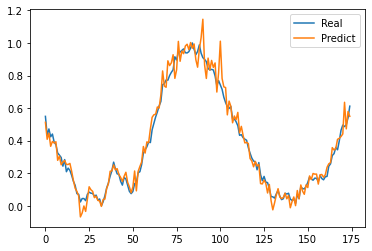

In [9]:
# visualize the training output

import matplotlib.pyplot as plt


X_train = (torch.tensor(training_data.data)).double()
y_train = (torch.tensor(training_data.labels)).double()


plt.figure()
plt.plot(y_train, label = "Real")     
plt.plot(model(X_train).detach().numpy(), label = "Predict")
plt.legend()


0.10629020921127265


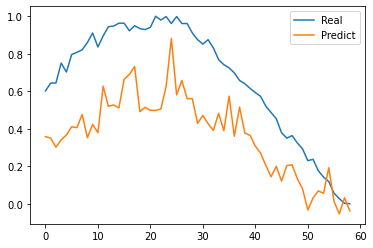

In [10]:
# visualize the test output

import matplotlib.pyplot as plt


X_test = (torch.tensor(testing_data.data)).double()
y_test = (torch.tensor(testing_data.labels)).double()

y_pred = model(X_test)

loss = nn.MSELoss()
print(loss(y_pred, y_test).item())

plt.figure()
plt.plot(y_test, label = "Real")     
plt.plot(y_pred.detach().numpy(), label = "Predict")
plt.legend()

In [11]:
# Define the hyperparameter search space
from ray import tune

config_space = {
    "hidden_size": tune.choice([64, 128, 256]),
    "num_layers": tune.choice([1, 2, 3]),
    "dropout": tune.uniform(0.1, 0.5),
    "lr": tune.loguniform(1e-4, 1e-1),
    "num_epochs": 10
}

# Launch the Ray Tune experiment
analysis = tune.run(
    model,
    config=config_space,
    num_samples=10,
    search_alg=tune.suggest.hyperopt,
    metric="mean_accuracy",
    mode="max"
)

AttributeError: module 'ray.tune' has no attribute 'suggest'

In [ ]:
tuner = tune.Tuner(
    train_mnist,
    param_space = {
    'batch_size': tune.choice([5, 10, 20]),
    'hidden_dim': tune.choice([32, 64, 128]),
    'num_hidden_layers': tune.choice([1, 2, 3, 4, 5]),
    'learning_rate': tune.choice([1e-6, 1e-5, 1e-4, 1e-3]),
    'weight_decay': tune.choice([1e-6, 1e-5, 1e-4, 1e-3]),
    'epoch_num': tune.choice([50, 100, 120, 150, 180, 200, 400]) },
    tune_config=tune.TuneConfig(
            metric="loss",
            mode="min")
)
analysis = tuner.fit()
print("Best config: ", analysis.get_best_result("mean_loss","min"))